In [64]:
import os
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')

from mne import Epochs,find_events

from eegnb import generate_save_path
from eegnb import generate_save_fn
from eegnb.devices.eeg import EEG
from eegnb.analysis.utils import load_data,plot_conditions,load_csv_as_raw
from eegnb.datasets import fetch_dataset
from eegnb.devices.utils import EEG_INDICES, SAMPLE_FREQS

In [65]:
board_name = 'muse2'
device_name = board_name
experiment = 'auditory_oddball'
subject = 1
session_nb = 1

#ch_ind = EEG_INDICES[device_name]
#sfreq = SAMPLE_FREQS[device_name]

# Create save file name
save_fn = generate_save_fn(board_name, experiment, subject, session_nb)
print(save_fn)


eegnb_data_path = generate_save_path(board_name, experiment, subject, session_nb)



raw = load_data(subject, session_nb, device_name, experiment, replace_ch_names=None, verbose=1, site='all', data_dir=None)
      

#raw = load_data(subject,session_nb,
#                experiment=experiment, device_name=board_name,
#                data_dir = eegnb_data_path)

C:\Users\surya/.eegnb\data\auditory_oddball\local\muse2\subject0001\session001\recording_2020-10-26-15.27.54.csv
['TP9', 'AF7', 'AF8', 'TP10', 'stim']
Creating RawArray with float64 data, n_channels=5, n_times=268668
    Range : 0 ... 268667 =      0.000 ...  1049.480 secs
Ready.
['TP9', 'AF7', 'AF8', 'TP10', 'stim']
Creating RawArray with float64 data, n_channels=5, n_times=268668
    Range : 0 ... 268667 =      0.000 ...  1049.480 secs
Ready.
['TP9', 'AF7', 'AF8', 'TP10', 'stim']
Creating RawArray with float64 data, n_channels=5, n_times=268656
    Range : 0 ... 268655 =      0.000 ...  1049.434 secs
Ready.
['TP9', 'AF7', 'AF8', 'TP10', 'stim']
Creating RawArray with float64 data, n_channels=5, n_times=268656
    Range : 0 ... 268655 =      0.000 ...  1049.434 secs
Ready.
['TP9', 'AF7', 'AF8', 'TP10', 'stim']
Creating RawArray with float64 data, n_channels=5, n_times=268668
    Range : 0 ... 268667 =      0.000 ...  1049.480 secs
Ready.
['TP9', 'AF7', 'AF8', 'TP10', 'stim']
Creating 

Effective window size : 8.000 (s)


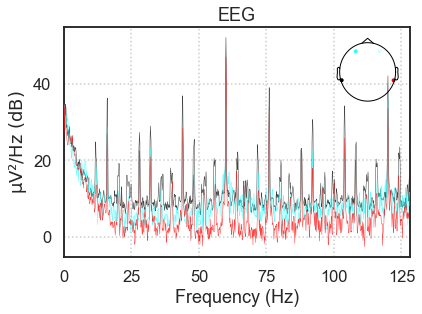

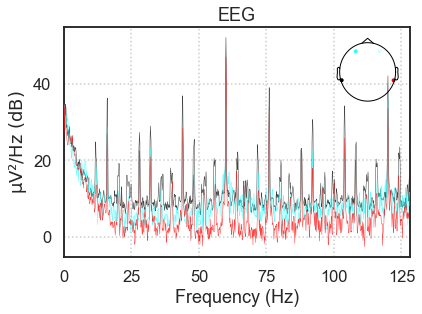

In [66]:
raw.plot_psd()

Filtering raw data in 6 contiguous segments
Setting up band-pass filter from 1 - 30 Hz
Using filter length: 268668

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 8.000 (s)


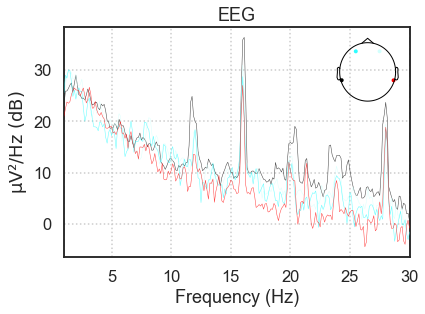

In [67]:
raw.filter(1,30, method='iir')
raw.plot_psd(fmin=1, fmax=30);

In [93]:
from mne import merge_events
events = find_events(raw)

8094 events found
Event IDs: [  1   2  10  20  22  99 100 101 102 110 120 122]


sample drop %:  36.92858907832963


<Epochs  |   5105 events (all good), -0.101562 - 0.800781 sec, baseline off, ~36.2 MB, data loaded,
 'Deviant': 3402
 'Standard': 1703>

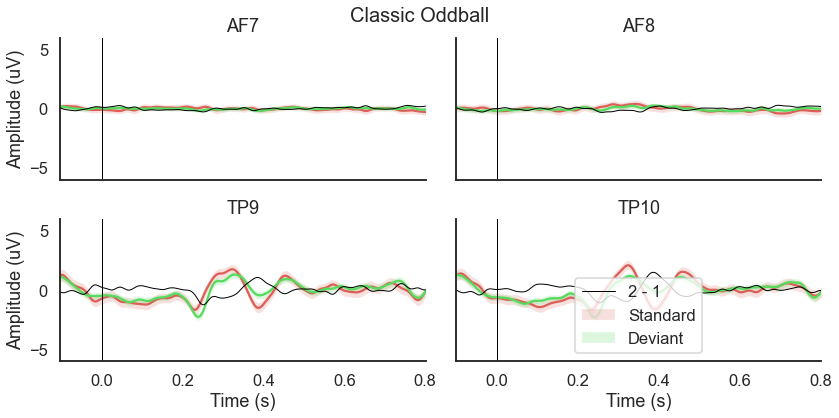

In [101]:
cevents = merge_events(events, [1, 2, 10, 20, 22], 1)
cevents = merge_events(cevents, [100, 101, 102, 110, 120, 122], 2)
event_id = {'Standard': 1, 'Deviant': 2}

epochs = Epochs(raw, events=cevents, event_id=event_id,
                tmin=-0.1, tmax=0.8, baseline=None,
                reject={'eeg': 75e-6}, preload=True,
                verbose=False, picks=[0,1,2,3])

conditions = OrderedDict()
conditions['Standard'] = [1]
conditions['Deviant'] = [2]

fig, ax = plot_conditions(epochs, conditions=conditions,
                          ci=97.5, n_boot=1000, title='Classic Oddball',
                          diff_waveform=(1, 2))

print('sample drop %: ', (1 - len(epochs.events)/len(cevents)) * 100)
epochs

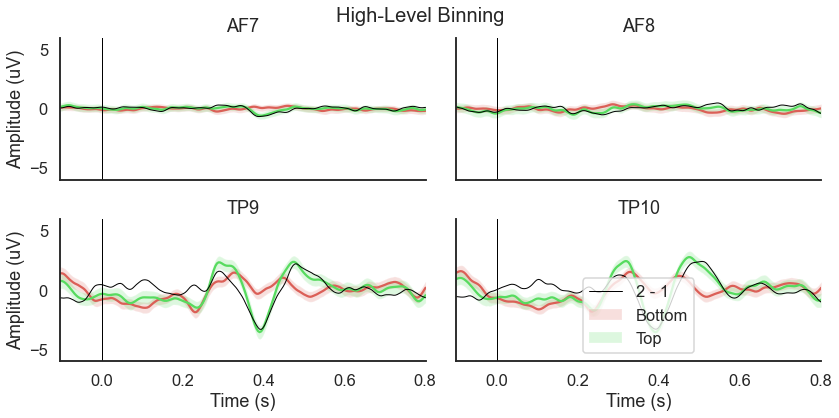

In [98]:
hevents = merge_events(events, [10, 110], 1)
hevents = merge_events(hevents, [20, 22, 120, 122], 2)
event_id = {'Bottom': 1, 'Top': 2}

epochs = Epochs(raw, events=hevents, event_id=event_id,
                tmin=-0.1, tmax=0.8, baseline=None,
                reject={'eeg': 75e-6}, preload=True,
                verbose=False, picks=[0,1,2,3])

conditions = OrderedDict()
conditions['Bottom'] = [1]
conditions['Top'] = [2]

fig, ax = plot_conditions(epochs, conditions=conditions,
                          ci=97.5, n_boot=1000, title='High-Level Binning',
                          diff_waveform=(1, 2))
print('sample drop %: ', (1 - len(epochs.events)/len(hevents)) * 100)
epochs

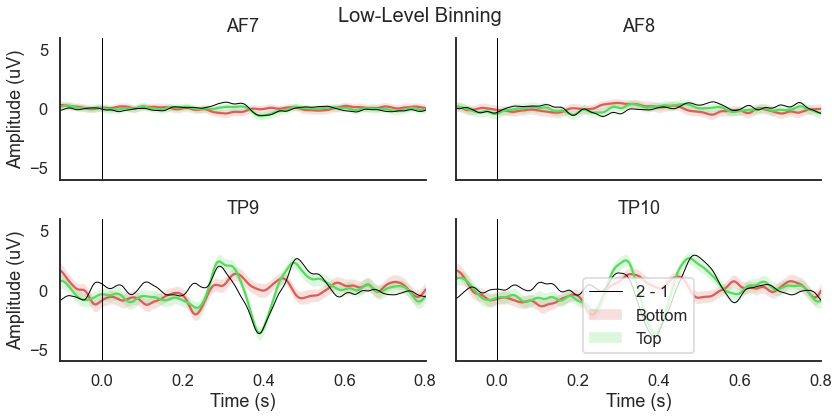

In [99]:
levents = merge_events(events, [1, 101], 1)
levents = merge_events(levents, [2, 22, 102, 122], 2)
event_id = {'Bottom': 1, 'Top': 2}

epochs = Epochs(raw, events=levents, event_id=event_id,
                tmin=-0.1, tmax=0.8, baseline=None,
                reject={'eeg': 75e-6}, preload=True,
                verbose=False, picks=[0,1,2,3])

conditions = OrderedDict()
conditions['Bottom'] = [1]
conditions['Top'] = [2]

fig, ax = plot_conditions(epochs, conditions=conditions,
                          ci=97.5, n_boot=1000, title='Low-Level Binning',
                          diff_waveform=(1, 2))
print('sample drop %: ', (1 - len(epochs.events)/len(levents)) * 100)
epochs